In [ ]:
# Predicting the cryptocurrency market
To predict future values of cryptocurrencies, we first need to collect historic data for the cryptocoins we want to explore. <br>
We've found historic data for Bitcoin, Etherium, Doge and USD (stable). <br>

The data used in this data science project can be found in the ```data``` folder in the root of this project. 

# Pre-processing the data

## Preprocessing using ELT
ELT is short for Extract Load Transform, witch means that we first extract the data, then load it in using python, then we trnasform the data to something that we can use for further exploration of the data. 


## Read the data (Load the data)
First of, we load the csv files. These are all located in the ```data``` folder in the root of this project. <br>
We read the data in order to process and visualize it later. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')

# Load the csv files into dataframes
dogeDF_full = pd.read_csv('./data/doge.csv')
ethDF_full = pd.read_csv('./data/eth.csv')
btcDF_full = pd.read_csv('./data/btc.csv')
usdDF = pd.read_csv('./data/usd.csv')



## Cleaning and selecting relevant data
To visualize and further use the data we need to "clean up" the data. Since columns that we are not interested in or does not contain values will disturb the visualization and invalidate our results in the end. 

### Cleaning and selecting relevant data for Doge Coin

In [2]:
print("Doge shape: ", dogeDF_full.shape)
print(dogeDF_full.head())

Doge shape:  (2703, 44)
         date  AdrActCnt  AssetEODCompletionTime  BlkCnt  BlkSizeByte  \
0  2013-12-08       6990              1611240186    2486      1707027   
1  2013-12-09      10863              1611240186    1526      2759110   
2  2013-12-10      12132              1611240187    1417      2971715   
3  2013-12-11      43044              1611240187    1575      8431778   
4  2013-12-12      61432              1611240187    1460     13549784   

   BlkSizeMeanByte  CapMVRVCur  CapMrktCurUSD  CapRealUSD  DiffMean  ...  \
0       686.656074         NaN            NaN         0.0  0.494418  ...   
1      1808.066841         NaN            NaN         0.0  2.376904  ...   
2      2097.187721         NaN            NaN         0.0  3.361733  ...   
3      5353.509841         NaN            NaN         0.0  5.092981  ...   
4      9280.673973         NaN            NaN         0.0  7.277436  ...   

   TxTfrValAdjUSD  TxTfrValMeanNtv  TxTfrValMeanUSD  TxTfrValMedNtv  \
0        

We can see that there is a LOT of data columns and together with it a lot of NaN values. Let's get rid of the columns we are not interested in and take a look at the rest of the data. We have chosen to work with the values of Doge in USD, so let's isolate that column together with the date/timestamp so we still know the order of the data, since the order is very relevant in currency data.

In [3]:
dogeDF = pd.DataFrame(dogeDF_full, columns=['date', 'PriceUSD'])
dogeDF

,date,PriceUSD
0,2013-12-08,NaN
1,2013-12-09,NaN
2,2013-12-10,NaN
3,2013-12-11,NaN
4,2013-12-12,NaN
...,...,...
2698,2021-04-28,0.322858
2699,2021-04-29,0.306599
2700,2021-04-30,0.338295
2701,2021-05-01,0.391757


We can see that we are still having some NaN values. So let's find out how many values we are missing, and then descide what to do with these values.

In [4]:
# Check for missing values
print(dogeDF.isnull().sum())

date         0
PriceUSD    46
dtype: int64


It looks like we are missing 46 values, let's find out if these values are continuous from one end of our dataset. 

In [5]:
# Check if data is contiuous from beginning of dataset
dogeDF[0:46].isnull().sum()

date         0
PriceUSD    46
dtype: int64

It turns out that the values we do not have are the 46 oldest values in the Doge Coin data. So we've decided to remove these lines from our dataset. 

In [6]:
# Remove first 46 lines 
dogeDF = dogeDF[46:]

Now, let's see the format of the date column in the Doge Coin dataset.

In [7]:
dogeDF['date'].head()

46    2014-01-23
47    2014-01-24
48    2014-01-25
49    2014-01-26
50    2014-01-27
Name: date, dtype: object

This look very good, we do not need to clean this data since it is in an acceptable format. So now we can make the same procedure for the 3 other datasets. They will not be as well documented as Doge Coin since we are using the same procedure. 

## Cleaning and refining Bitcoin, Etherium and USD datasets

In [8]:
# Extracting columns
ethDF = pd.DataFrame(ethDF_full, columns=['date', 'PriceUSD'])

# Removing NaN values
print("Null values in whole dataset: \n",ethDF.isnull().sum())
print("Null values in first nine entries: \n",ethDF[0:9].isnull().sum())
ethDF = ethDF[9:]
print(ethDF.head())

Null values in whole dataset: 
 date        0
PriceUSD    9
dtype: int64
Null values in first nine entries: 
 date        0
PriceUSD    9
dtype: int64
          date  PriceUSD
9   2015-08-08   1.19999
10  2015-08-09   1.19999
11  2015-08-10   1.19999
12  2015-08-11   0.99000
13  2015-08-12   1.28800


In [9]:
# Extracting columns
btcDF = pd.DataFrame(btcDF_full, columns=['date', 'PriceUSD'])

# Removing NaN values
print("Null values in whole dataset: \n",btcDF.isnull().sum())
print("Null values in first nine entries: \n",btcDF[0:561].isnull().sum())
btcDF = btcDF[561:]
print(btcDF.head())

Null values in whole dataset: 
 date          0
PriceUSD    561
dtype: int64
Null values in first nine entries: 
 date          0
PriceUSD    561
dtype: int64
           date  PriceUSD
561  2010-07-18  0.085840
562  2010-07-19  0.080800
563  2010-07-20  0.074736
564  2010-07-21  0.079193
565  2010-07-22  0.058470


In [10]:
usdDF.isnull().sum()
print(usdDF.head())

       Date   Open   High    Low  Close
0  04/30/21  90.63  91.32  90.59  91.28
1  04/29/21  90.55  90.79  90.42  90.61
2  04/28/21  90.90  91.13  90.55  90.61
3  04/27/21  90.88  91.07  90.81  90.91
4  04/26/21  90.86  90.99  90.68  90.81


In [11]:
for i in range(len(usdDF['Date'])):
    #04/30/21
    newarr = usdDF['Date'][i].split('/')
    if newarr[2] > str(22):
        s = '19' + str(newarr[2]) + '-' + str(newarr[0]) + '-' + str(newarr[1])
    else:
        s = '20' + str(newarr[2]) + '-' + str(newarr[0]) + '-' + str(newarr[1])
    
    usdDF['Date'][i] = s
    #2021-04-30

usdDF.sort_values(by=['Date'], inplace=True, ascending=True)

usdDF

<ipython-input-11-5c09fed516e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usdDF['Date'][i] = s


,Date,Open,High,Low,Close
9005,1986-01-20,124.87,124.93,124.52,124.59
9004,1986-01-21,124.40,124.63,124.18,124.51
9003,1986-01-22,124.77,124.97,123.88,124.75
9002,1986-01-23,124.47,124.72,124.24,124.45
9001,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
4,2021-04-26,90.86,90.99,90.68,90.81
3,2021-04-27,90.88,91.07,90.81,90.91
2,2021-04-28,90.90,91.13,90.55,90.61
1,2021-04-29,90.55,90.79,90.42,90.61


Now we have selected the data we want and removed any NaN values that could interfere with our results.
We have done this for all the currencies. 

# Visualizing the data
We will now visualize the data to quickly be able to identify information about our datasets. 

## Visualizing Doge Coin
We will visualize Doge Coins value in USD using a 2D line-plot. This gives an easy understanding of the values of the coin over time. <br> 
When Doge Coin has been visualized we visualize the other cryptocurrencies using the same technique as with Doge Coin.

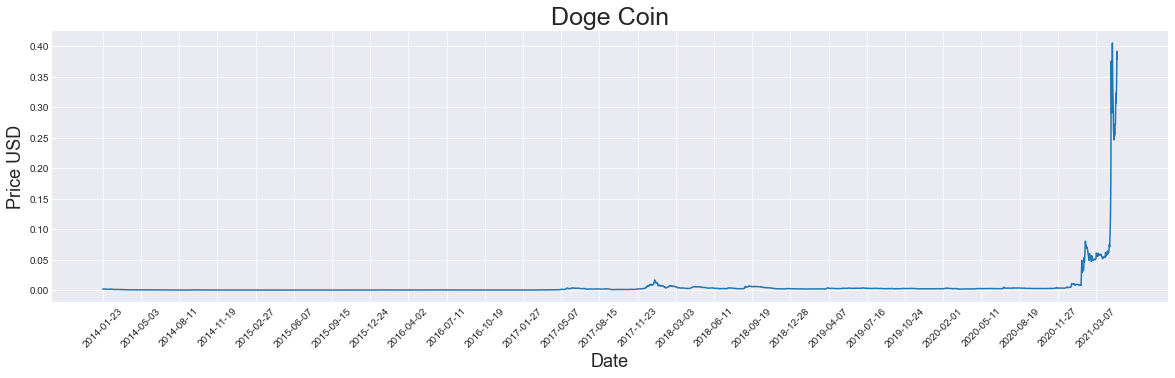

In [12]:
# Build the figure and plot the Doge dataframe
plt.figure(figsize=(20,5))
plt.plot(range(0, dogeDF.shape[0]),(dogeDF['PriceUSD']))

# Setting the x labels (interval = 100 days)
plt.xticks(range(0,dogeDF.shape[0],100),dogeDF['date'].loc[::100],rotation=45) 

# Design the labels 
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Doge Coin',fontsize=25)

plt.show() 

## Visualising Etherium

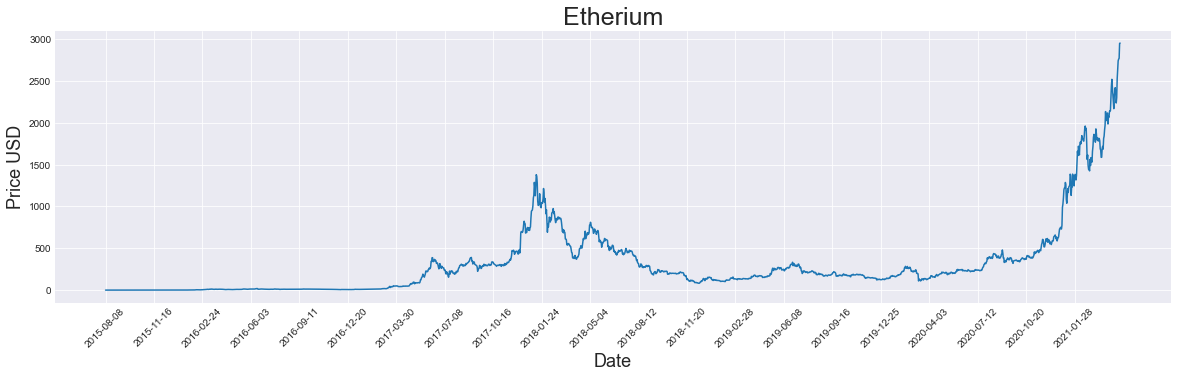

In [13]:
# Build the figure and plot the Etherium dataframe
plt.figure(figsize=(20,5))
plt.plot(range(0, ethDF.shape[0]),(ethDF['PriceUSD']))
# Setting the x labels (interval = 100 days)
plt.xticks(range(0,ethDF.shape[0],100),ethDF['date'].loc[::100],rotation=45)
# Design the labels
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Etherium', fontsize=25)
plt.show()

## Visualising Bitcoin

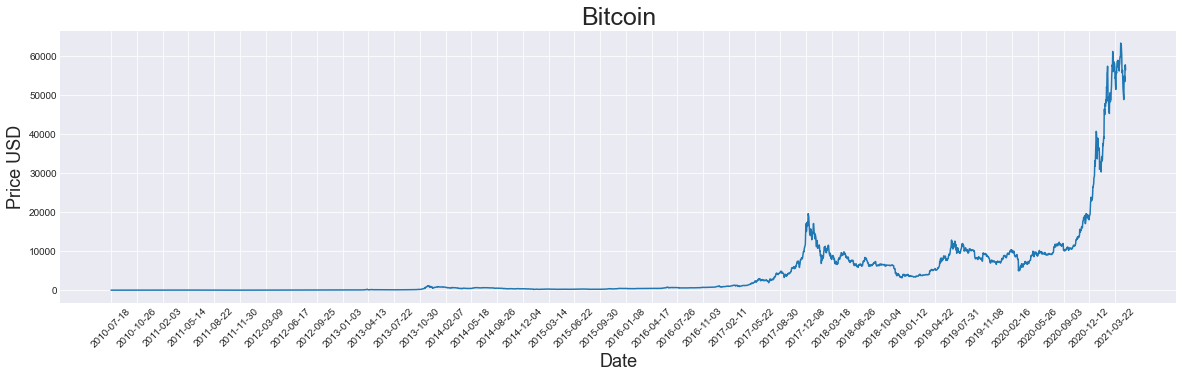

In [14]:
# Build the figure and plot the Bitcoin dataframe
plt.figure(figsize=(20,5))
plt.plot(range(0, btcDF.shape[0]),(btcDF['PriceUSD']))
# Setting the x labels (interval = 100 days)
plt.xticks(range(0,btcDF.shape[0],100),btcDF['date'].loc[::100],rotation=45)
# Design the labels
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Bitcoin', fontsize=25)
plt.show()

## Comparing the cryptocurrencies
To easily compare the values of the cryptocurrency, we have plottet all the cryptocurrencies in the same graph.

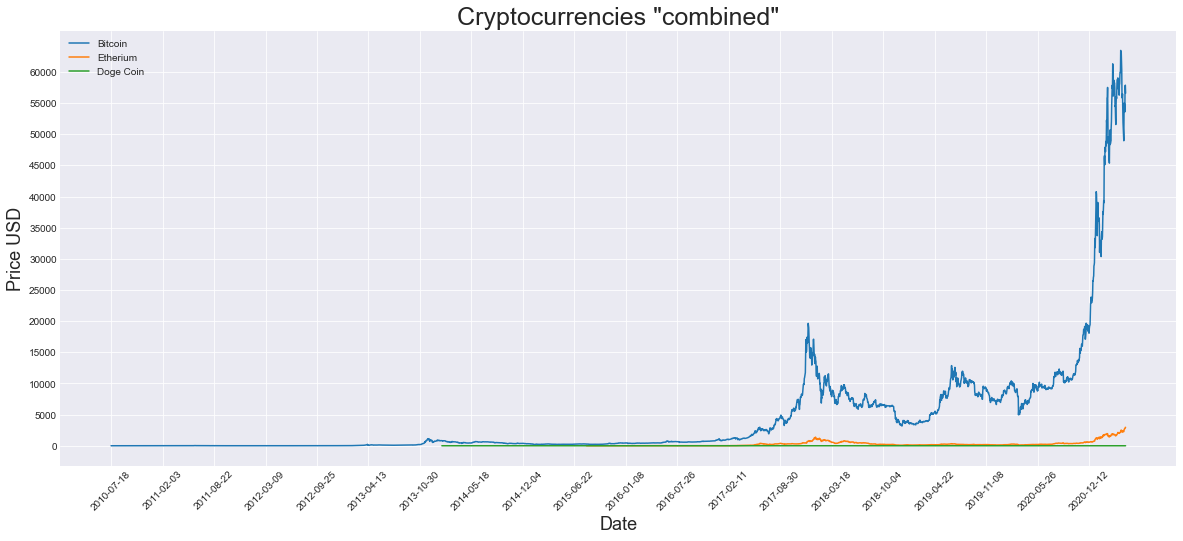

In [15]:
plt.figure(figsize=(20,8))
plt.plot(btcDF['date'],btcDF['PriceUSD'], label='Bitcoin')
plt.plot(ethDF['date'],ethDF['PriceUSD'], label='Etherium')
plt.plot(dogeDF['date'],dogeDF['PriceUSD'], label='Doge Coin')
plt.xticks(range(0,btcDF.shape[0],200),btcDF['date'].loc[::200],rotation=45)
plt.yticks(range(0,int(btcDF['PriceUSD'].max()), 5000))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD',fontsize=18)
plt.title('Cryptocurrencies "combined"', fontsize=25)
plt.legend(loc='best')
plt.show()

We can now easily see that Bitcoin has a very large value compared to the other coins, keep in mind that we have more data from some currencies than others. This is due to the fact that the coins have not existed for the same amount of time. This is why the Doge Coin and Etherium lines starts "later" in the plot on the x-axis.

# How many coins can you get for 1000$?
To answer this question, we need to use the most current value and divide 1000 by this value.

In [16]:
howManyDoge = 1000 / np.array(dogeDF['PriceUSD'][-1:])
howManyEtherium = 1000 / np.array(ethDF['PriceUSD'][-1:])
howManyBitcoin = 1000 / np.array(btcDF['PriceUSD'][-1:])

print("Amount of coins for a 1000$:")
print("   Doge (DOGE): ", round(howManyDoge[0],5))
print("Etherium (ETH): ", round(howManyEtherium[0],5))
print(" Bitcoin (BTC): ", round(howManyBitcoin[0],5))

Amount of coins for a 1000$:
   Doge (DOGE):  2640.18669
Etherium (ETH):  0.3387
 Bitcoin (BTC):  0.01768


The value of the coins is really put into perspective when comparring with a resonable amount of USD where you would get 2640.19 DOGE, you would only recieve 0.018 BTC due to it's very large value. Etherium comes in a place in between with 0.339 ETH available for 1000$. 

# Zoom in on the last year
We want to show how the coins have evolved in the last year (the most recent year). To get a realistic and comparable result we need to calculate the percentwise change instead of looking at the actual values. This is because the change in percent is what really matters when investing your money in these currencies. 
This is what determines what your gain or loss will be from your initial investment. <br>

First we create a method that can calculate the percentage increase or decrease between values in an array:

In [17]:
# This method calculates the change in percent from the first value 
# in an array and returns a new array with the percent values. 
def calculatePercentageRise(data):
    percentArray = []

    for i in range(0, len(data)):
        percentArray.append(((data[i] - data[0])/data[0]) * 100)
    
    return np.array(percentArray)

Now lets use this new method to find the percent changes of the three cryptocurrencies. After calculating the percent array, we grap the chance to see the maximum percent changes in the one year period. 

In [18]:
btcTemp = btcDF['PriceUSD'][-365:]
btcTemp = btcTemp.reset_index(drop=True)
bitPercentArray = calculatePercentageRise(btcTemp)
bitPercentArray.max()

613.1290960602086

In [19]:
ethTemp = ethDF['PriceUSD'][-365:]
ethTemp = ethTemp.reset_index(drop=True)
ethPercentArray = calculatePercentageRise(ethTemp)
ethPercentArray.max()

1305.3351952119067

In [20]:
dogeTemp = dogeDF['PriceUSD'][-365:]
dogeTemp = dogeTemp.reset_index(drop=True)
dogePercentArray = calculatePercentageRise(dogeTemp)
dogePercentArray.max()

15872.361448487563

## Show the percent change over the last year
Now we have all the data necessary to show the changes in percent over the last year for the three cryptocurrencies. 


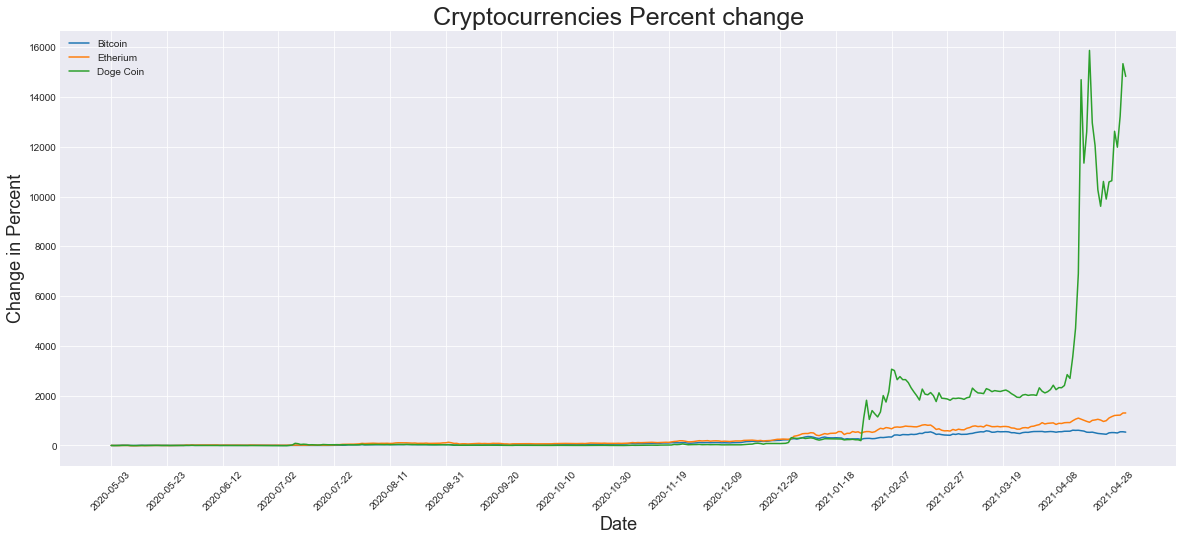

In [21]:
plt.figure(figsize=(20,8))
plt.plot(btcDF['date'][-365:],bitPercentArray, label='Bitcoin')
plt.plot(ethDF['date'][-365:],ethPercentArray, label='Etherium')
plt.plot(dogeDF['date'][-365:],dogePercentArray, label='Doge Coin')
plt.xticks(range(0,365,20),btcDF['date'][-365:].loc[::20],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Change in Percent',fontsize=18)
plt.title('Cryptocurrencies Percent change', fontsize=25)
plt.legend(loc='best')
plt.show()

## Explaining the graph
It's now visible that Doge Coin has increased with almost 16000% since it's value a year ago! However it is very important to keep in mind that even though it does not look like much. The Etherium currency has almost increased by 1500% and Bitcoin with almost 600%. <br>
In comparisson, according to thestreet.com [source](https://www.thestreet.com/investing/thestreets-25-best-stocks-of-2020), tesla stocks increased with around 700% in 2020, making cryptocurrencies a better investment in this timeframe!

If we isolate Etherium and Bitcoin, it will be much more visible how much they have changed over the period of one year. We do this underneath.


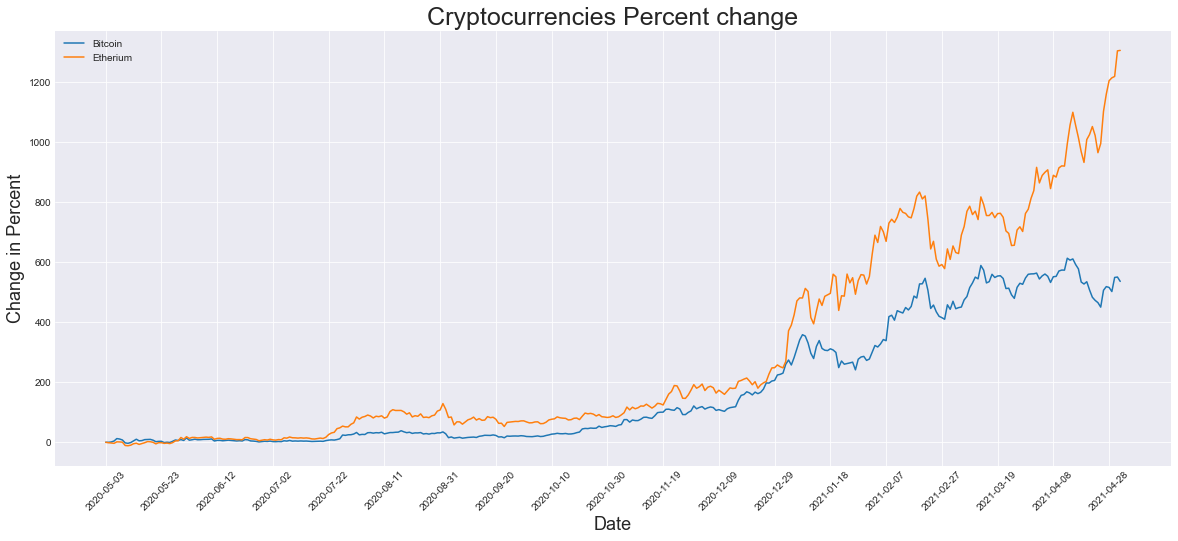

In [22]:
plt.figure(figsize=(20,8))
plt.plot(btcDF['date'][-365:],bitPercentArray, label='Bitcoin')
plt.plot(ethDF['date'][-365:],ethPercentArray, label='Etherium')
plt.xticks(range(0,365,20),btcDF['date'][-365:].loc[::20],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Change in Percent',fontsize=18)
plt.title('Cryptocurrencies Percent change', fontsize=25)
plt.legend(loc='best')
plt.show()

# How much could you have gained for a 1000$ in the last year?
What if you had invested a 1000$ in one of these coins a year ago, how much would you have earned? Well, lets find out!
We do this by multiplying 1000 with the percent increase in decimal. 



In [23]:
gainDOGE = 1000 * (dogePercentArray[-1:][0] / 100)
gainETH = 1000 * (ethPercentArray[-1:][0] / 100)
gainBTC = 1000 * (bitPercentArray[-1:][0] / 100)

print("Gain in USD over the last year")
print("DOGE:", gainDOGE)
print("ETH:", gainETH)
print("BTC:", gainBTC)

Gain in USD over the last year
DOGE: 148269.26373244927
ETH: 13053.351952119066
BTC: 5358.760967472501


This really puts the numbers in perspective! Let's start with the lowest "gainer" in the last year, the Bitcoin. A thousand dollar investment in Bitcoin a year ago, would by now have a value of 5358.76\$. That means that if you sold at this point you would have gained 4358.76\$ from your original investment! That is quite a bit, but on second place we have Etherium. A thousand dollar investment in Etherium would now have a value of 13.053.35\$! That means that you have earned a total of 12.053.35\$ when subtracting the 1000\$ invested a year ago. Now, in first place we have Doge Coin. Doge Coin would have transformed the thousand dollar investement into a staggering 148269.26\$. 

# Predicting future values
Analysing previous data is good, but predicting the future is better. Especially when it can generate a big revenue. <br>
We will now try to predict future values of cryptocurrency using Machine Learning. <br>
We are dealing with a form of data that is not independant. That means that the data is sequencial and that future values can depend on past values. This is in comparisson with other data like the Iris dataset. The Iris dataset is data representing leaf sizes of a flower. Here past data does not influence future data, and any Iris flower can be independantly measured, and the order of the data does not matter to the Machine Learning algoritm in play. <br>

We've trained, tested and exported the Machine Learning models from #FILENAMES, ```/pre_processing/bitcoin_predicter.ipynb```,,,,, and hereby made it possible to show our result underneath by importing the models and visualizing their results.

# Predicting 1 day in the future
We have build, trained and tested this model in ```/pre_processing/bitcoin_predicter.ipynb```. See this file for info about the model. Underneath we will show the results of the model. First off, when watching just one day ahead, the model predicted that Bitcoin would have the following value: 11571.019\$, the true value of a Bitcoin on that day was 11531.66\$. So predicting one day in the future using our model already has a significant margin of error. We have calculated the mean squared error (MSE) of this prediction to be 1549.1. This is not a good result. <br>

### Looking 1 day in the future (multiple times)
The Neural Network used to create this predicting uses the real values of the dataset to predict "the next day". So all this model can ever predict is a maximum of one day ahead. The model can however use the real data to predict one day ahead multiple times in a row. 
When doing this to predict day 271 (20% cut for test set), we can see how far off this model will be is 271 days. This is visualized in the graph below. The image is taken from the ```/pre_processing/bitcoin_predicter.ipynb``` where it can also be found.  

![1 day prediction image](images/1-day-prediction.png)

The model is, as it is seen from the graph, far from perfect. With only one day predictions. It does not seem that we would profit much from following this model. 


# Predicting 1 year in the future
We had a big margin of error when predicting one day ahead in bitcoin. We believe that a part of that error could be due to the rapid ups and downs in bitcoins values. Therefore we want to eleminate this unstableness when predicting further in the future, this we will try to do by using a stable currency, in this case the value of the USD. Then if it turns out with a low error, we can try with one of the relatively unstable cryptocurrencies. Since one UD dollar is always worth one US dollar, the values represented is index numbers representing the value of the US dollar.   
We trained this model as we did with the privious model, except our USD dataset is much bigger, this could be helpful for our neural network. After training this model, we tried to make a long term prediction using the "one day ahead" prediction method, just like the previous section. Our test dataset consists of 20% of the data, this equals 901 datapoint. On the image below it is visible that the model does fairly well with the USD dataset, predicting 901 days in the future (OBS: really only one day prediction at a time, the model is dependent on true values from a window before the prediction). 

![graph 901 days (one day ahead prediction)](images/901dayprediction.png)

Looking at the error (MSE) for this prediction, it also looks a lot better than the bitcoin prediction. The average MSE for this prediction is 89.82. Comparred to the bitcoin prediction with a MSE of 1549.1, it has improved drastically. 
The MSE for each point can be plottet with the prediction so it is visible what margin of error we are working with, using these one day ahead predictions. 

![graph 901 days (one day ahead prediction) MSE](images/901daypredictionerror.png)

It looks pretty good actually, so let's move on to making a 1 year prediction independant of the true values, creating a prediction from nothing to 365 days forward. 

The training, testing and results from this model can be found in ```pre_processing/cos_predict_usd.ipynb```. 
What we have done with this model is to remove the use of true values to predict the next value, resulting in only one day predictions. Instead of feeding it new true values for each prediction we are feeding the model it's own previous predictions. This result in a graph like the one below: 

![graph of one year prediction](images/1-year-prediction.png)

Again we see that the model differentiates from the true values. It seems to predict a constant loss in value from the prediction starts. Lets zoom in on the prediction to see what really happens. 

![graph of one year prediction](images/1-year-prediction-zoom.png)

It seems that the model quickly spins into a negative feedback loop, repeating similar "patterns" being bigger and bigger for each feedback loop. 



# 

# Conclusion
Looking at the value of the selected cryptocurrencies we se a tendency for them to grow immensely over a short period of time the past few months and the change in value doesn't seem to follow any pattern. This makes it nearly impossible for our model to predict a somewhat correct future value for any of our cryptocurrencies solely on the values. Since the value is tied in with the financial market, it is dependant on many factors that influence us as a people to add value to the different digital values. These factors include influence from other people, inflation and the state of the global economy. 

It would be interesting to add these factors to our model and see if these could improve the results of the predictions. The factors might be tweets from Elon Musk, which have shown to have an impact on the value of the DogeCoin and BitCoin, the tweets would have to be analysed as they have had different effects, some resulting in an increase of value while others in a decrease. It also seems that the value follows such events as 2015 blackmonday and 2018 crash, which has decreassed the value of the coin but then reach a new all time high. But it seems that negative circumstances do not imediatelly decrease the value. Looking at the current Covid-19 crisis we can see that during this time the value has increassed. 

But untill those are added, we will still have to rely on luck.